# Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import random

# Load the image into a numpy array

In [2]:
path_to_jpg_file = "sample.jpg"
img = mpimg.imread(path_to_jpg_file)

In [3]:
img.shape

(1000, 1600, 3)

# Display the image

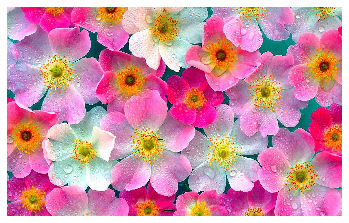

In [4]:
plt.imshow(img)
plt.axis('off')
plt.show()

# Reshape the image

In [5]:
pixels = img.reshape((-1,3))

In [6]:
pixels.shape

(1600000, 3)

In [7]:
pixels[0]

array([241, 220, 251], dtype=uint8)

# Clustering for k=3

In [8]:
n_clusters = 3
kmeans = KMeans(n_clusters).fit(pixels)

### Determine label of each pixel

In [9]:
c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = kmeans.labels_ 

In [10]:
c.head(3)

,R,G,B,label
0,241,220,251,1
1,229,208,239,1
2,217,196,227,1


### Map each pixel to its center

In [11]:
centers_map_R = {i:kmeans.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:kmeans.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:kmeans.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

In [12]:
c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,241,220,251,1,212.908553,173.506025,199.634559
1,229,208,239,1,212.908553,173.506025,199.634559
2,217,196,227,1,212.908553,173.506025,199.634559


### Plot the clustered image

In [13]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

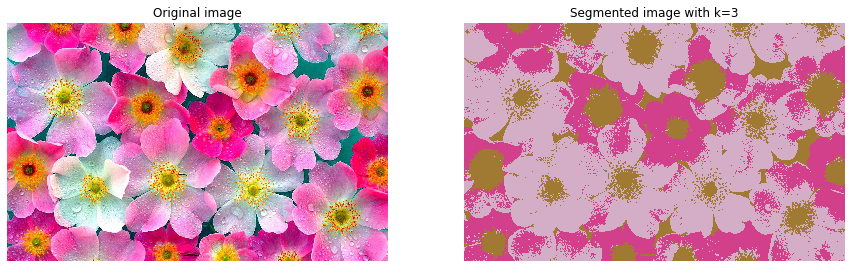

In [14]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

# Clustering for k=6

In [15]:
n_clusters = 6
kmeans = KMeans(n_clusters).fit(pixels)

### Determine label of each pixel

In [16]:
c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = kmeans.labels_ 

In [17]:
c.head(3)

,R,G,B,label
0,241,220,251,1
1,229,208,239,1
2,217,196,227,1


### Map each pixel to its center

In [18]:
centers_map_R = {i:kmeans.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:kmeans.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:kmeans.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

In [19]:
c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,241,220,251,1,227.305537,204.122117,221.846787
1,229,208,239,1,227.305537,204.122117,221.846787
2,217,196,227,1,227.305537,204.122117,221.846787


### Plot the clustered image

In [20]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

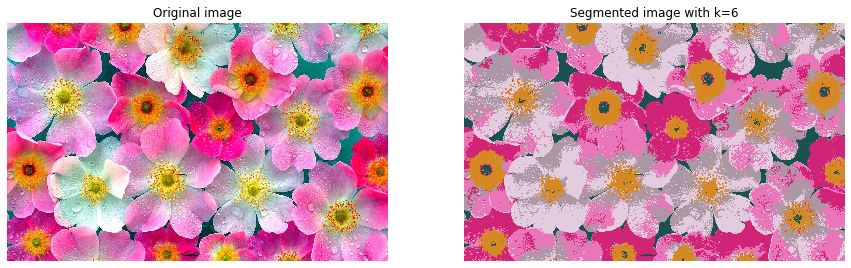

In [21]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

# Use the Elbow method to find the optimum k value for this image

In [22]:
# a list of within-cluster sum of squares (WCSS) for each clustering solution
wcss =[]
k_range = range(2, 21)
for k in k_range:
    print(f'Processing k={k}')
    kmeans = KMeans(k)
    kmeans.fit(pixels)
    wcss.append(kmeans.inertia_)
    
wcss

Processing k=2
Processing k=3
Processing k=4
Processing k=5
Processing k=6
Processing k=7
Processing k=8
Processing k=9
Processing k=10
Processing k=11
Processing k=12
Processing k=13
Processing k=14
Processing k=15
Processing k=16
Processing k=17
Processing k=18
Processing k=19
Processing k=20


[10235113003.466248,
 8012998266.182357,
 5972139279.270844,
 4595652481.536826,
 3784765594.015454,
 3383848731.0286913,
 3046826588.6463237,
 2752307648.1659107,
 2520819034.4586616,
 2343113754.163895,
 2175861346.481506,
 2037889884.2209473,
 1922549441.0785456,
 1822041124.427034,
 1732308590.4945512,
 1651460744.1249237,
 1577509922.4338748,
 1510074854.7096152,
 1454216789.0696263]

### Plot the number of clusters vs WCSS

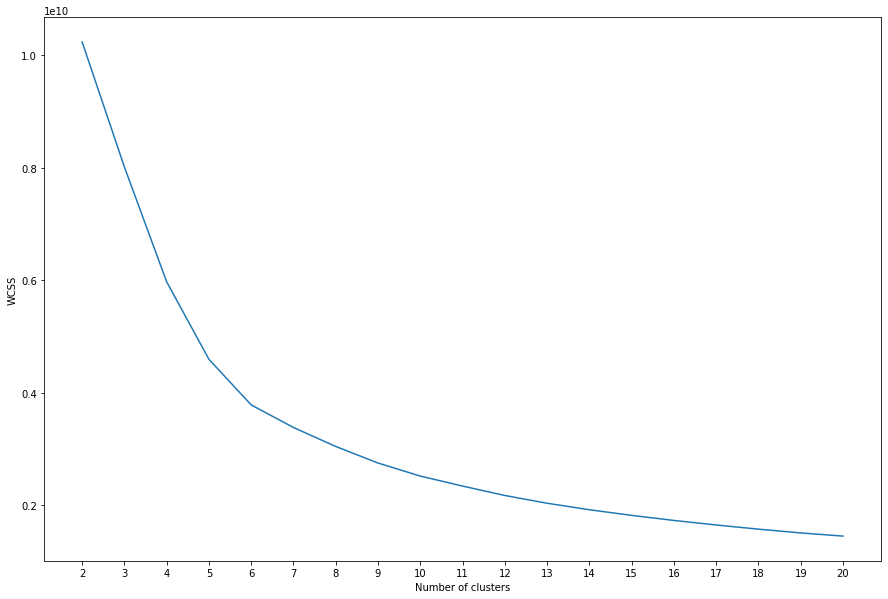

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(k_range, wcss)
ax.set_xticks(k_range)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

The plot demonstrates that k=6 is the optimum value